In [85]:
import pandas as pd
import matplotlib.pyplot as plt

In [86]:
data = pd.read_csv("../data/NYPD_Arrests_Data_(Historic)_20251214.csv")

In [87]:
data.head()

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lon_Lat
0,292125359,08/22/2024,616,"LOITERING,TRANSPORTATION FACIL",672,LOITERING,PL 2403506,V,M,18,1,45-64,M,ASIAN / PACIFIC ISLANDER,989780.0,218177.0,40.765520,-73.980037,POINT (-73.98003670045068 40.765520112238185)
1,290712577,07/26/2024,610,"LOITERING,GAMBLING,OTHER",571,"LOITERING/GAMBLING (CARDS, DIC",PL 2403502,V,M,25,0,25-44,M,WHITE HISPANIC,1001487.0,232707.0,40.805388,-73.937736,POINT (-73.937736 40.805388)
2,284867197,04/05/2024,610,"LOITERING,GAMBLING,OTHER",571,"LOITERING/GAMBLING (CARDS, DIC",PL 2403502,V,B,46,0,25-44,M,BLACK HISPANIC,1008225.0,250623.0,40.854545,-73.913334,POINT (-73.913334 40.854545)
3,284867205,04/05/2024,610,"LOITERING,GAMBLING,OTHER",571,"LOITERING/GAMBLING (CARDS, DIC",PL 2403502,V,B,46,0,25-44,M,BLACK HISPANIC,1008225.0,250623.0,40.854545,-73.913334,POINT (-73.913334 40.854545)
4,284739174,04/03/2024,616,"LOITERING,TRANSPORTATION FACIL",672,LOITERING,PL 2403506,V,B,52,1,25-44,M,WHITE HISPANIC,1011612.0,253618.0,40.862755,-73.901079,POINT (-73.90107874094647 40.86275507175744)


In [88]:
data.dtypes

ARREST_KEY             int64
ARREST_DATE           object
PD_CD                  int64
PD_DESC               object
KY_CD                  int64
OFNS_DESC             object
LAW_CODE              object
LAW_CAT_CD            object
ARREST_BORO           object
ARREST_PRECINCT        int64
JURISDICTION_CODE      int64
AGE_GROUP             object
PERP_SEX              object
PERP_RACE             object
X_COORD_CD           float64
Y_COORD_CD           float64
Latitude             float64
Longitude            float64
Lon_Lat               object
dtype: object

In [89]:
## First, I want to see what kinds of loitering people have gotten arrested for since 2006. ## 

In [90]:
loitering_kind_counts = data ["PD_DESC"].value_counts()
print (loitering_kind_counts)

PD_DESC
LOITERING FOR PROSTITUTION OR TO PATRONIZE    7393
LOITERING,GAMBLING,OTHER                       607
LOITERING 1ST DEGREE FOR DRUG PURPOSES         578
LOITERING,TRANSPORTATION FACILITY              543
LOITERING,SCHOOL                               121
LOITERING,MASQUERADING                          56
LOITERING,TRANSPORTATION FACIL                   2
LOITERING 1ST DEGREE FOR DRUG                    2
LOITERING FOR PROSTITUTION OR                    1
LOITERING,BEGGING                                1
Name: count, dtype: int64


In [91]:
## Interesting -- loitering arrests are primarily for prostitution. What borough has the highest arrest amount for prostitution?" ##

In [92]:
boro_counts = data ["ARREST_BORO"].value_counts()
print (boro_counts)

ARREST_BORO
K    2887
M    2753
B    2153
Q    1246
S     265
Name: count, dtype: int64


In [93]:
## Those numbers are all pretty close. Let's try to see them a bit clearer. ##

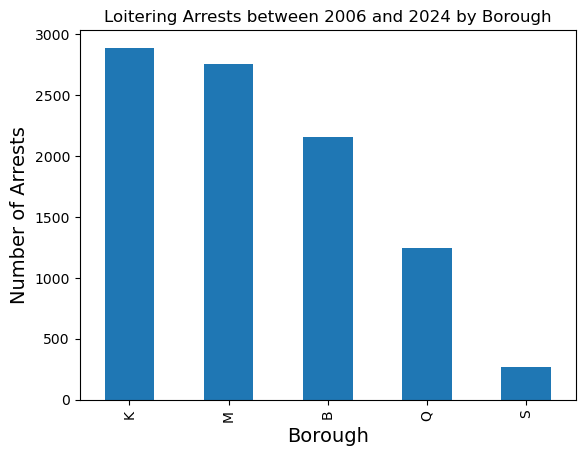

In [176]:
boro_counts_graph = boro_counts.plot (kind="bar", ylabel = "ARREST_BORO", title = "Loitering Arrests between 2006 and 2024 by Borough")
plt.xlabel("Borough", fontsize = 14)
plt.ylabel("Number of Arrests", fontsize = 14)
plt.savefig("loitering_graph_1", dpi = 300)

In [95]:
## Seems that Brooklyn just beats out Manhattan for the highest amount of arrests for loitering. Is the top arrest in Brooklyn the same 
## as the top arrests of "Loitering For Prostituion or To Patronize" in all five boroughs? ##

In [96]:
loitering_kind_bk = data[data["ARREST_BORO"] == "K"]["PD_DESC"].value_counts()
print(loitering_kind_bk)

PD_DESC
LOITERING FOR PROSTITUTION OR TO PATRONIZE    2414
LOITERING,GAMBLING,OTHER                       268
LOITERING,TRANSPORTATION FACILITY               67
LOITERING 1ST DEGREE FOR DRUG PURPOSES          66
LOITERING,SCHOOL                                65
LOITERING,MASQUERADING                           6
LOITERING FOR PROSTITUTION OR                    1
Name: count, dtype: int64


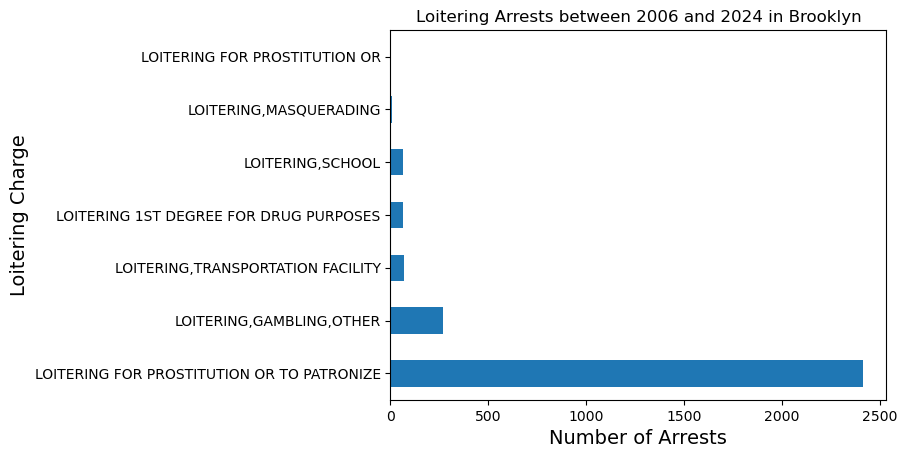

In [175]:
loitering_kind_bk_graph = loitering_kind_bk.plot (kind="barh", ylabel = "ARREST_BORO", title = "Loitering Arrests between 2006 and 2024 in Brooklyn")
plt.xlabel("Number of Arrests", fontsize = 14)
plt.ylabel("Loitering Charge", fontsize = 14)
plt.savefig("loitering_graph_2", dpi = 300)

In [ ]:
## Seems abt the same. Let's see how that stacks up compared to the boro where the least amount of loitering arrests happen -- Staten Island. ## 

In [98]:
loitering_kind_si = data[data["ARREST_BORO"] == "S"]["PD_DESC"].value_counts()
print(loitering_kind_si)

PD_DESC
LOITERING FOR PROSTITUTION OR TO PATRONIZE    251
LOITERING 1ST DEGREE FOR DRUG PURPOSES          9
LOITERING,GAMBLING,OTHER                        2
LOITERING,BEGGING                               1
LOITERING,TRANSPORTATION FACILITY               1
LOITERING,SCHOOL                                1
Name: count, dtype: int64


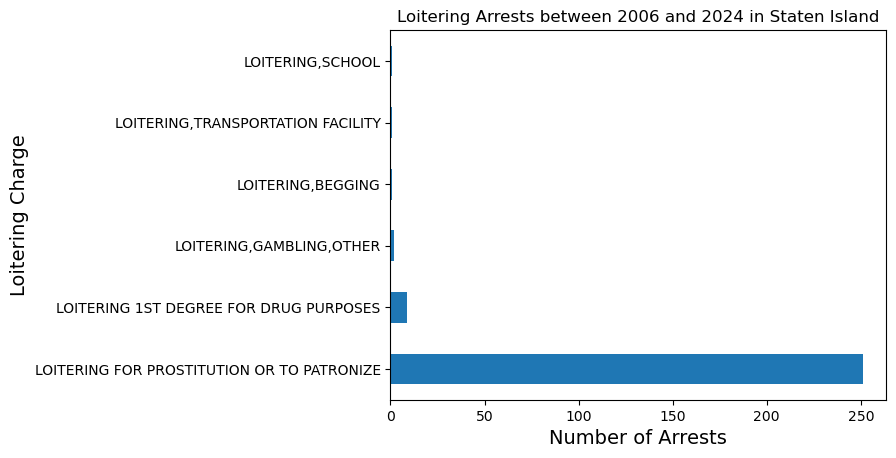

In [174]:
loitering_kind_si_graph = loitering_kind_si.plot (kind="barh", ylabel = "ARREST_BORO", title = "Loitering Arrests between 2006 and 2024 in Staten Island")
plt.xlabel("Number of Arrests", fontsize = 14)
plt.ylabel("Loitering Charge", fontsize = 14)
plt.savefig("loitering_graph_3", dpi = 300)

In [ ]:
## Even in Staten Island, which has less loitering arrests, the top arrest charge is for prostitution. Has this always been the case? ##
## To find this out, we'll have to reformat the "ARREST_DATE" column to only include the year of arrests. ##

In [105]:
data["ARREST_DATE_YEAR"] = data["ARREST_DATE"].str[-4:]

In [106]:
data.head()

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lon_Lat,ARREST_DATE_YEAR
0,292125359,08/22/2024,616,"LOITERING,TRANSPORTATION FACIL",672,LOITERING,PL 2403506,V,M,18,1,45-64,M,ASIAN / PACIFIC ISLANDER,989780.0,218177.0,40.765520,-73.980037,POINT (-73.98003670045068 40.765520112238185),2024
1,290712577,07/26/2024,610,"LOITERING,GAMBLING,OTHER",571,"LOITERING/GAMBLING (CARDS, DIC",PL 2403502,V,M,25,0,25-44,M,WHITE HISPANIC,1001487.0,232707.0,40.805388,-73.937736,POINT (-73.937736 40.805388),2024
2,284867197,04/05/2024,610,"LOITERING,GAMBLING,OTHER",571,"LOITERING/GAMBLING (CARDS, DIC",PL 2403502,V,B,46,0,25-44,M,BLACK HISPANIC,1008225.0,250623.0,40.854545,-73.913334,POINT (-73.913334 40.854545),2024
3,284867205,04/05/2024,610,"LOITERING,GAMBLING,OTHER",571,"LOITERING/GAMBLING (CARDS, DIC",PL 2403502,V,B,46,0,25-44,M,BLACK HISPANIC,1008225.0,250623.0,40.854545,-73.913334,POINT (-73.913334 40.854545),2024
4,284739174,04/03/2024,616,"LOITERING,TRANSPORTATION FACIL",672,LOITERING,PL 2403506,V,B,52,1,25-44,M,WHITE HISPANIC,1011612.0,253618.0,40.862755,-73.901079,POINT (-73.90107874094647 40.86275507175744),2024


In [133]:
## The new arrest date column appears at the end. Let's check specifically for "Loitering For Prostituion or To Patronize." ##

In [137]:
loitering_prostitution_year = data.groupby("ARREST_DATE_YEAR")["PD_DESC"].value_counts()
print("\nCounts using value_counts():")
print(loitering_prostitution_year)


Counts using value_counts():
ARREST_DATE_YEAR  PD_DESC                                   
2006              LOITERING FOR PROSTITUTION OR TO PATRONIZE    1034
                  LOITERING 1ST DEGREE FOR DRUG PURPOSES         128
                  LOITERING,TRANSPORTATION FACILITY               82
                  LOITERING,GAMBLING,OTHER                        72
                  LOITERING,SCHOOL                                31
                                                                ... 
2020              LOITERING,GAMBLING,OTHER                        12
2021              LOITERING,GAMBLING,OTHER                         5
2022              LOITERING,GAMBLING,OTHER                         7
2024              LOITERING,GAMBLING,OTHER                         3
                  LOITERING,TRANSPORTATION FACIL                   2
Name: count, Length: 82, dtype: int64


In [ ]:
## While "Loitering for Prostitution or To Patronize" was the top arrest in 2006, the top loitering arrests has become "Loitering, Gambling, Other"
## in the past four years, and at a much smaller amount. This lines up with the legislation that repealed prior loitering laws and moves by city DAs to stop 
## prosecuting prostitution. 

In [ ]:
## But when exactly did this slow-down happen? Let's see. ## 

In [159]:
top_loitering_charge_by_year = loitering_prostitution_year.groupby(level = 0).nlargest(1)
print ("Top Loitering Charge By Year:")
print (top_loitering_charge_by_year)

Top Loitering Charge By Year:
ARREST_DATE_YEAR  ARREST_DATE_YEAR  PD_DESC                                   
2006              2006              LOITERING FOR PROSTITUTION OR TO PATRONIZE    1034
2007              2007              LOITERING FOR PROSTITUTION OR TO PATRONIZE    1058
2008              2008              LOITERING FOR PROSTITUTION OR TO PATRONIZE    1052
2009              2009              LOITERING FOR PROSTITUTION OR TO PATRONIZE     949
2010              2010              LOITERING FOR PROSTITUTION OR TO PATRONIZE     956
2011              2011              LOITERING FOR PROSTITUTION OR TO PATRONIZE     742
2012              2012              LOITERING FOR PROSTITUTION OR TO PATRONIZE     467
2013              2013              LOITERING FOR PROSTITUTION OR TO PATRONIZE     360
2014              2014              LOITERING FOR PROSTITUTION OR TO PATRONIZE     248
2015              2015              LOITERING FOR PROSTITUTION OR TO PATRONIZE     198
2016              201

In [160]:
## While 2021 is cited as the year that the legal framework criminalizing prostiution was repealed, data shows that arrests had decreased significantly before.
## While "Loitering For Prostitution or To Patronize" continued to be the top loitering arrest until 2021, the number of arrests dramatically decreased
## By 275 arrests between 2011 and 2012. ## 

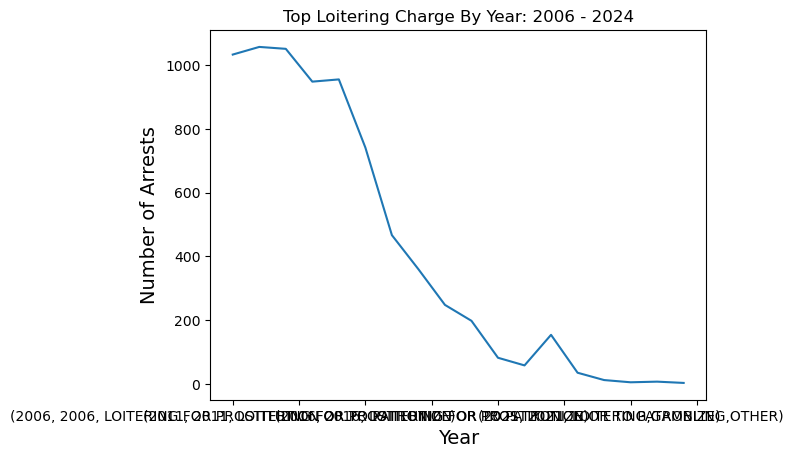

In [173]:
top_loitering_charge_by_year.plot(x = "ARREST_DATE_YEAR", y = "PD_DESC", kind = "line")
plt.title("Top Loitering Charge By Year: 2006 - 2024")
plt.xlabel("Year", fontsize = 14)
plt.ylabel("Number of Arrests", fontsize = 14)
plt.savefig("loitering_graph_4", dpi = 300)

In [169]:
## A graph showing the change.##